Episode 1, Total Reward: 0
Episode 2, Total Reward: 0
Episode 3, Total Reward: 0
Episode 4, Total Reward: 0
Episode 5, Total Reward: 0
Episode 6, Total Reward: 0
Episode 7, Total Reward: 0
Episode 8, Total Reward: 0
Episode 9, Total Reward: 0
Episode 10, Total Reward: 0
Episode 11, Total Reward: 0
Episode 12, Total Reward: 0
Episode 13, Total Reward: 0
Episode 14, Total Reward: 0
Episode 15, Total Reward: 0
Episode 16, Total Reward: 0
Episode 17, Total Reward: 0
Episode 18, Total Reward: 0
Episode 19, Total Reward: 0
Episode 20, Total Reward: 0
Episode 21, Total Reward: 0
Episode 22, Total Reward: 0
Episode 23, Total Reward: 0
Episode 24, Total Reward: 0
Episode 25, Total Reward: 0
Episode 26, Total Reward: 0
Episode 27, Total Reward: 0
Episode 28, Total Reward: 0
Episode 29, Total Reward: 0
Episode 30, Total Reward: 0
Episode 31, Total Reward: 0
Episode 32, Total Reward: 0
Episode 33, Total Reward: 0
Episode 34, Total Reward: 0
Episode 35, Total Reward: 0
Episode 36, Total Reward: 0
E

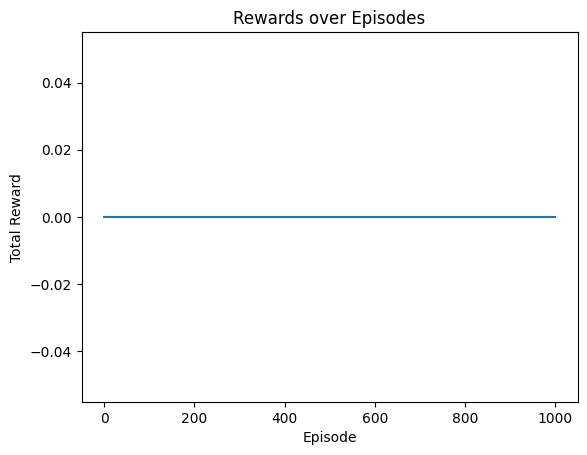

In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

class HVACEnvironment(gym.Env):
    def __init__(self):
        super(HVACEnvironment, self).__init__()
        # Define action space (e.g., temperature adjustments)
        self.action_space = gym.spaces.Discrete(3)  # Example: 3 actions: increase, decrease, or maintain temperature
        # Define observation space (e.g., current temperature)
        self.observation_space = gym.spaces.Box(low=np.array([0.0]), high=np.array([100.0]), dtype=np.float32)
        # Initialize state (e.g., current temperature)
        self.current_temperature = 70.0

    def reset(self):
        # Reset environment to initial state
        self.current_temperature = 70.0
        return np.array([self.current_temperature])

    def step(self, action):
        # Take action (e.g., adjust temperature based on action)
        if action == 0:  # Increase temperature
            self.current_temperature += 1.0
        elif action == 1:  # Decrease temperature
            self.current_temperature -= 1.0
        # else: Maintain temperature
        # Update temperature within reasonable bounds
        self.current_temperature = np.clip(self.current_temperature, 0.0, 100.0)
        # Calculate reward based on temperature (e.g., comfort level)
        reward = -(self.current_temperature - 70.0)**2  # Example: reward penalizes deviation from 70°F
        # Check if episode is done (optional)
        done = True  # You can define a termination condition
        # Return observation, reward, done, and additional information (optional)
        return np.array([self.current_temperature]), reward, done, {}

# Q-learning agent
class QLearningAgent:
    def __init__(self, action_space, lr=0.1, gamma=0.9, epsilon=0.1):
        self.action_space = action_space
        self.lr = lr  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration-exploitation trade-off parameter
        # Initialize Q-table
        self.q_table = np.zeros((self.action_space.n,))

    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.action_space.n)  # Exploration: random action
        else:
            return np.argmax(self.q_table)  # Exploitation: choose action with highest Q-value

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table)
        td_target = reward + self.gamma * self.q_table[best_next_action]
        td_error = td_target - self.q_table[action]
        self.q_table[action] += self.lr * td_error

# Main training loop
env = HVACEnvironment()
agent = QLearningAgent(env.action_space)

rewards = []
for episode in range(1000):  # Example: 1000 episodes
    state = env.reset()
    total_reward = 0
    done = True
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    rewards.append(total_reward)
    print(f"Episode {episode + 1}, Total Reward: {total_reward}")

# Plotting rewards
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.show()